In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import utils


is_about_climate_change_sql_statement = {
    # "en": "", TODO test dummy
    "de": 
        """
        ((title ~* 'klima' AND title ~* '(wandel|änder|wechsel|krise|erwärm|erhitz|problem|zustand|katastroph|trend|
        politik|desaster|schwank|projekt|schutz|schädlich|schadet|schaden|auswirk|ziel|plan|gipfel|treffen|vertrag|
        ausschuss|beschluss|strategie|aktivis|demo|einsatz|einsetz|streik)')
        OR (title ~* '(global|erde|welt|international)' AND title ~* '(erwärm|erhitz|temperatur)')
        OR (title ~* 'treibhaus' AND title ~* '(gas|effekt)'))
        """,
    # "nw": "", TODO test dummy
    # "sp": "" TODO test dummy
}

data = []

for publisher in utils.publishers:
    if publisher.language not in is_about_climate_change_sql_statement:  # TODO test dummy
        continue

    with utils.db_conn() as conn:
        df = pd.read_sql_query(
            f"""
            SELECT to_timestamp(TO_CHAR(published, 'YYYY'), 'YYYY') AS published_date, COUNT(*) AS n
            FROM article
            WHERE publisher = '{publisher}' AND (SELECT EXTRACT(YEAR FROM published)) >= 2015
            AND {is_about_climate_change_sql_statement[publisher.language]}
            GROUP BY TO_CHAR(published, 'YYYY')
            ORDER BY TO_CHAR(published, 'YYYY');
            """
            , conn)
        data.append((df, publisher))

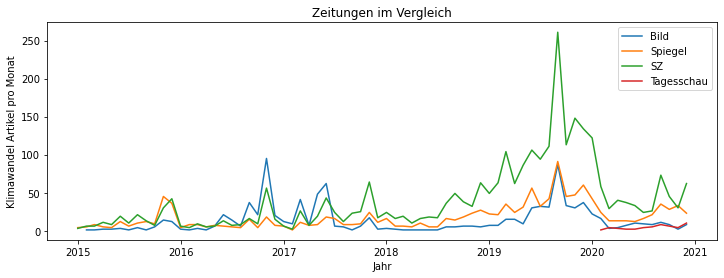

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.set_xlabel("Jahr")
ax.set_ylabel("Klimawandel Artikel pro Monat")
ax.set_title("Zeitungen im Vergleich")

for df, publisher in data:
    ax.plot(df["published_date"], df["n"], label=publisher)
    
ax.legend()

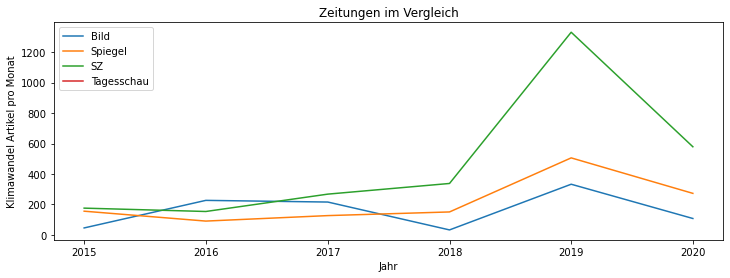

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.set_xlabel("Jahr")
ax.set_ylabel("Klimawandel Artikel pro Monat")
ax.set_title("Zeitungen im Vergleich")

for df, publisher in data:
    ax.plot(df["published_date"], df["n"], label=publisher)
    
ax.legend()